In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import kurtosis, skew, normaltest, chi2, norm, t, spearmanr, f
import colorsys
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
from scipy.stats import kurtosistest
warnings.filterwarnings('ignore', category=UserWarning, message='kurtosistest only valid for n>=20')


In [2]:
def find_p(dict, a, k, sigma):
  fa, fb = 0, 0
  for key, value in dict.items():
      if key < (a - k*sigma):
          fa += value
      if key < (a + k*sigma):
          fb += value
  return ((fb-fa)*100)

def Pearson(dict, n, h):
    sumAv, sumD, i = 0, 0, 0
    nt = []
    middle = []
    for key, value in dict.items():
        list2 = key.split('-')
        middle.append((int(list2[0]) + int(list2[1]))/2)
        sumAv += middle[i]*value
        i += 1
    avg2 = sumAv/n
    i = 0
    for key, value in dict.items():
        sumD += (middle[i]-avg2)**2 * value
        i +=1
    sigma1 = math.sqrt(sumD/n)
    Xin, i = 0, 0
    for key, value in dict.items():
        list2 = key.split('-')
        zi = (middle[i]-avg2)/sigma1
        density = norm.pdf(zi, loc=0, scale=1)
        nt.append(h*n*density/sigma1)
        Xin += (value- nt[i])**2/nt[i]
        i += 1
    k = i - 3
    critical_value = chi2.ppf(1 - 0.05, k)
    return [nt, Xin, critical_value]

def ys(xs, x_list, y_list):
    sorted_values = sorted(zip(x_list, y_list))
    x_list, y_list = map(list, zip(*sorted_values))
    for i in range(0, len(x_list)-1):
        if (xs > x_list[i]) and (xs < x_list[i+1]):
            ys_result = y_list[i] + (y_list[i+1] - y_list[i]) * (xs - x_list[i]) / (x_list[i+1] - x_list[i])
        if (xs == x_list[i]):
            ys_result = y_list[x_list.index(xs)]
    return ys_result

def Pearson_coeff(x, y):
    xy = []
    for i in range(0, len(x)):
        xy.append(x[i] * y[i])
    avg_x = np.mean(x)
    avg_y = np.mean(y)
    avg_xy = np.mean(xy)
    sigma_x = np.std(x)
    sigma_y = np.std(y)
    return (avg_xy - avg_x*avg_y)/(sigma_x*sigma_y)

def coefficient(u_, v_):
    r1 = Pearson_coeff(u_, v_)
    print(f"Коэффициент корреляции Пирсона: {r1}")
    print(f"Коэффициент детерминации: {r1**2}")
    a1 = r1*(np.std(v_)/np.std(u_))
    b1 = np.mean(v_)-a1*np.mean(u_)
    print(f"Коэффициенты линеаризованного уравнения: a1 = {a1} и b1 = {b1}")
    return [a1, b1]

def model(nonlinear_y, x_list, nonlinear_model, new_x):
    sorted_values = sorted(zip(nonlinear_y, x_list))
    nonlinear_y, x_list = map(list, zip(*sorted_values))
    df = pd.DataFrame({'Значения нелинейной зависимости y': nonlinear_y, 'X': x_list})
    nonlinear_model.append(nonlinear_y.copy())
    new_x.append(x_list.copy())
    nonlinear_y.clear()
    print(df)
    print('\n')

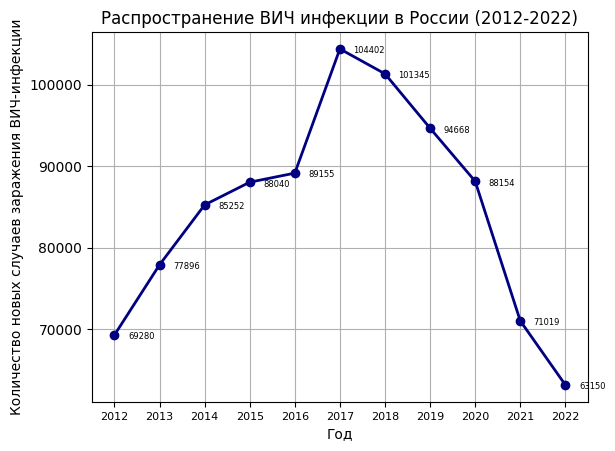

In [3]:
df = pd.read_excel('Статистика ВИЧ.xlsx')
result_dict = df.set_index(df.columns[0]).to_dict()[df.columns[1]]
plt.plot(df['Год'], df['Зарегистрировано новых заболевших, чел.'], marker='o', color="navy", linewidth= 2)
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Количество новых случаев заражения ВИЧ-инфекции')
plt.title('Распространение ВИЧ инфекции в России (2012-2022)')
plt.xticks(df['Год'], df['Год'], fontsize=8)
for i, txt in enumerate(df['Зарегистрировано новых заболевших, чел.']):
    plt.text(df['Год'][i]+0.3, df['Зарегистрировано новых заболевших, чел.'][i]-750, f"{df['Зарегистрировано новых заболевших, чел.'][i]}", ha='left', va='bottom', fontsize=6)
plt.show()

In [4]:
hiv_cases = list(result_dict.values())
max_value = max(hiv_cases)
min_value = min(hiv_cases)
range_value = max_value - min_value
median = np.median(hiv_cases)
n = len(hiv_cases)
sum1 = 0
total = 932361
#total = sum(hiv_cases)
avg1 = total/n
for i in range (0, len(hiv_cases)):
    sum1 += (hiv_cases[i]-avg1)**2
disp = sum1/n
print(f'Среднее:  {avg1: .2f}')
print(f'Дисперсия: {disp: .2f}')
print(f'Среднее квадратичное отклонения: {math.sqrt(disp): .2f}')
print(f'Коэффициент вариации: {math.sqrt(disp)/avg1*100: .2f}%')
print("Медиана:", median)
print("Максимальное значение:", max_value)
print("Минимальное значение:", min_value)
print("Размах:", range_value)
for key in result_dict:
  if result_dict[key] == max(result_dict.values()):
    Mo = key
print('Мода:', Mo, 'Значение:', max(result_dict.values()))
print('Общее число заболевших за период с 2012 по 2022:', total)


Среднее:   84760.09
Дисперсия:  158493332.26
Среднее квадратичное отклонения:  12589.41
Коэффициент вариации:  14.85%
Медиана: 88040.0
Максимальное значение: 104402
Минимальное значение: 63150
Размах: 41252
Мода: 2017 Значение: 104402
Общее число заболевших за период с 2012 по 2022: 932361


In [5]:
hiv_coef = []
for i in range (0, len(hiv_cases)):
    c = int(df['Зарегистрировано новых заболевших, чел.'][i])
    h = int(df['Численность населения РФ'][i])
    hiv_coef.append(c*100000/h)
df_k = pd.DataFrame({'Год': df['Год'],  'Уровень заболеваемости на 100 тыс. населения' : hiv_coef})
print(df_k)

     Год  Уровень заболеваемости на 100 тыс. населения
0   2012                                     48.428458
1   2013                                     54.340843
2   2014                                     59.340030
3   2015                                     60.191175
4   2016                                     60.838088
5   2017                                     71.116411
6   2018                                     68.998299
7   2019                                     64.496209
8   2020                                     60.071446
9   2021                                     48.252463
10  2022                                     42.965011


In [6]:
count = 1
sum, summt, sumc, summtt = 0, 0, 0, 0 
for key, value in result_dict.items():
    if count == 1:
        sum += value
        y = value
    else:
        sum += value
        print(f"Показатели динамики на {key} год: \n")
        print(f"Базисный абсолютный прирост: {value-y}")
        print(f"Цепной абсолютный прирост: {value-last}")
        print (f"Базисный темп роста: {value*100/y}%")
        print (f"Цепной темп роста: {value*100/last}%")
        print (f"Базисный темп прироста: {(value-y)*100/y}%")
        print (f"Цепной темп прироста: {(value-last)*100/last}% \n")
        r = value - y
        d = value/y
    last = value
    summt += (count)*value
    summtt += (count)**2
    sumc += count
    count += 1

Показатели динамики на 2013 год: 

Базисный абсолютный прирост: 8616
Цепной абсолютный прирост: 8616
Базисный темп роста: 112.4364896073903%
Цепной темп роста: 112.4364896073903%
Базисный темп прироста: 12.4364896073903%
Цепной темп прироста: 12.4364896073903% 

Показатели динамики на 2014 год: 

Базисный абсолютный прирост: 15972
Цепной абсолютный прирост: 7356
Базисный темп роста: 123.05427251732101%
Цепной темп роста: 109.44336037793981%
Базисный темп прироста: 23.054272517321017%
Цепной темп прироста: 9.443360377939817% 

Показатели динамики на 2015 год: 

Базисный абсолютный прирост: 18760
Цепной абсолютный прирост: 2788
Базисный темп роста: 127.07852193995382%
Цепной темп роста: 103.27030450898512%
Базисный темп прироста: 27.07852193995381%
Цепной темп прироста: 3.2703045089851264% 

Показатели динамики на 2016 год: 

Базисный абсолютный прирост: 19875
Цепной абсолютный прирост: 1115
Базисный темп роста: 128.68793302540416%
Цепной темп роста: 101.2664697864607%
Базисный темп прир

In [7]:
#data = {
#    "Год": [],
#    "Базисный абсолютный прирост": [],
#    "Цепной абсолютный прирост": [],
#    "Базисный темп роста": [],
#    "Цепной темп роста": [],
#    "Базисный темп прироста": [],
#    "Цепной темп прироста": []
#}
#
#count = 1
#y = 0
#last = 0
#for key, value in result_dict.items():
#    if count == 1:
#        sum += value
#        y = value
#    else:
#        sum += value
#        r = value - y
#        d = value / y
#        data["Год"].append(key)
#        data["Базисный абсолютный прирост"].append(value - y)
#        data["Цепной абсолютный прирост"].append(value - last)
#        data["Базисный темп роста"].append(f"{value*100/y}%")
#        data["Цепной темп роста"].append(f"{value*100/last}%")
#        data["Базисный темп прироста"].append(f"{(value-y)*100/y}%")
#        data["Цепной темп прироста"].append(f"{(value-last)*100/last}%")
#    last = value
#    summt += (count)*value
#    summtt += (count)**2
#    sumc += count
#    count += 1
#
#df = pd.DataFrame(data)
#print(df.to_string(index=False))

In [8]:
T = pow(d, 1/(n-1))
p = sum/(n)
print(f"Средний уровень ряда: {p: .2f}")
print(f"Средний абсолютный прирост: {r/(n-1)}")
print(f"Средний темп роста: {T*100: .2f} %")
print(f"Средний темп прироста: {T*100-100: .2f} %")

Средний уровень ряда:  84760.09
Средний абсолютный прирост: -613.0
Средний темп роста:  99.08 %
Средний темп прироста: -0.92 %


In [9]:
sa = last + r/(n-1)
print(f"Прогнозирование по среднему абсолютному приросту на 2023 год: {sa}")
st = T*last
print(f"Прогнозирование по среднему темпу роста на 2023 год: {st: .2f}")

Прогнозирование по среднему абсолютному приросту на 2023 год: 62537.0
Прогнозирование по среднему темпу роста на 2023 год:  62567.66


-5443922923.63592
Прогнозирование методом аналитического выравнивания на 2023 год:  48655.70


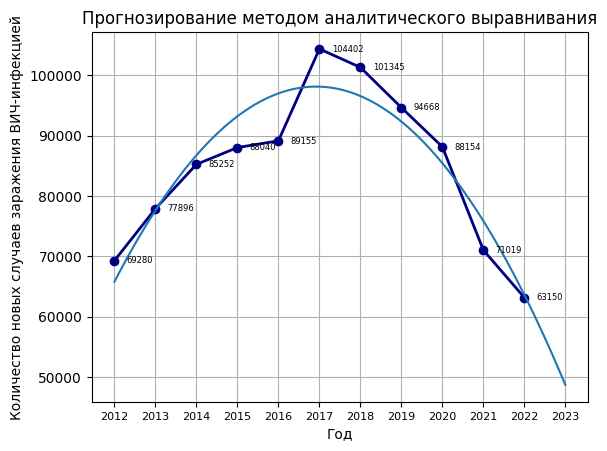

In [10]:
coeff = np.polyfit(df['Год'], df['Зарегистрировано новых заболевших, чел.'], 2)
year = np.arange(2012, 2024)
val = coeff[0]*year**2 + coeff[1]*year + coeff[2]
prog = coeff[0]*2023**2 + coeff[1]*2023 + coeff[2]
print(coeff[2])
print(f"Прогнозирование методом аналитического выравнивания на 2023 год: {prog: .2f}")

plt.plot(df['Год'], df['Зарегистрировано новых заболевших, чел.'], marker='o', color="navy", linewidth= 2)
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Количество новых случаев заражения ВИЧ-инфекцией')
plt.title('Прогнозирование методом аналитического выравнивания')
plt.xticks(year, year, fontsize=8)
for i, txt in enumerate(df['Зарегистрировано новых заболевших, чел.']):
    plt.text(df['Год'][i]+0.3, df['Зарегистрировано новых заболевших, чел.'][i]-750, f"{df['Зарегистрировано новых заболевших, чел.'][i]}", ha='left', va='bottom', fontsize=6)
cubic_interpolation_model = interp1d(year, val, kind = "cubic")
X_=np.linspace(year[0], year[len(year)-1], 500)
Y_=cubic_interpolation_model(X_)
plt.plot(X_, Y_)
plt.show()

   Период  Зарегистрировано больных ВИЧ
2011-2012                         69280
2012-2013                         77896
2013-2014                         85252
2014-2015                         88040
2015-2016                         89155
2016-2017                        104402
2017-2018                        101345
2018-2019                         94668
2019-2020                         88154
2020-2021                         71019
2021-2022                         63150


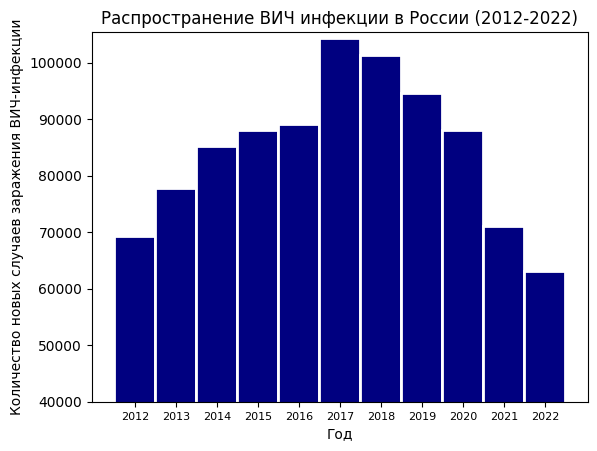

In [11]:

years = list(result_dict.keys())
means_min = int(min(years))
means_max = math.ceil(max(years))
h = 1
x = 2011
new_interval, align = {}, {}
align[x] = None
for key, value in result_dict.items():
  key = str(x) + '-' + str(int(x + h))
  new_interval[key] = value/total
  x += h
  align[x] = None
df_inter1 = pd.DataFrame({'Период': new_interval.keys(),  'Зарегистрировано больных ВИЧ' : df['Зарегистрировано новых заболевших, чел.']})
print(df_inter1.to_string(index=False))


plt.bar(df['Год'], df['Зарегистрировано новых заболевших, чел.'], color='navy', width=1, edgecolor="white", linewidth=2)
plt.xticks(df['Год'], df['Год'], fontsize=8)
plt.xlabel('Год')
plt.ylim(40000, max(df['Зарегистрировано новых заболевших, чел.'])+1000)
plt.ylabel('Количество новых случаев заражения ВИЧ-инфекции')
plt.title('Распространение ВИЧ инфекции в России (2012-2022)')
plt.show()

In [12]:
sum3, sum4 = 0, 0
prob = {}
for key, value in result_dict.items():
    prob[value] = result_dict[key]/total
    sum3 += (value-avg1)**3
    sum4 += (value-avg1)**4
sigma = math.sqrt(disp)
As = sum3/(n*sigma**3)
Ek = sum4/(n*sigma**4)-3
print(f'Ассиметрия: {As: .3f}')
print(f'Эксцесс: {Ek: .3f}')
print(f"{find_p(prob, avg1, 1, sigma):.2f}%")
print(f"{find_p(prob, avg1, 2, sigma)}%")
print(f"{find_p(prob, avg1, 3, sigma)}%")

n_inter = {}
for key, value in new_interval.items():
    n_inter[key] = value*total
results1 = Pearson(n_inter, total, h)
df_inter1 = pd.DataFrame({'Период': n_inter.keys(),  'Число заболеваний' : n_inter.values(), 'Теоретическое число заболеваний' : results1[0]})
print(df_inter1['Теоретическое число заболеваний'].to_string(index=False))
print(f"Наблюдаемое значение: {results1[1]}")
print(f"Критическое значение: {results1[2]}")
print("\nВывод:")
if results1[1] < results1[2]:
    print("Нет оснований отвергнуть гипотезу о нормальном распределения")
else:
    print("Гипотеза о нормальном распределения отвергается")

Ассиметрия: -0.157
Эксцесс: -1.016
56.11%
100.0%
100.0%
 30637.137978
 51035.311193
 75850.853154
100581.313004
118998.437587
125612.351503
118301.584173
 99406.756290
 74526.096250
 49850.322394
 29750.529353
Наблюдаемое значение: 128306.06512583833
Критическое значение: 15.507313055865453

Вывод:
Гипотеза о нормальном распределения отвергается


       x      f(x)
0   2011  0.024394
1   2012  0.043020
2   2013  0.067690
3   2014  0.095027
4   2015  0.119025
5   2016  0.133013
6   2017  0.132623
7   2018  0.117981
8   2019  0.093642
9   2020  0.066313
10  2021  0.041898
11  2022  0.023618


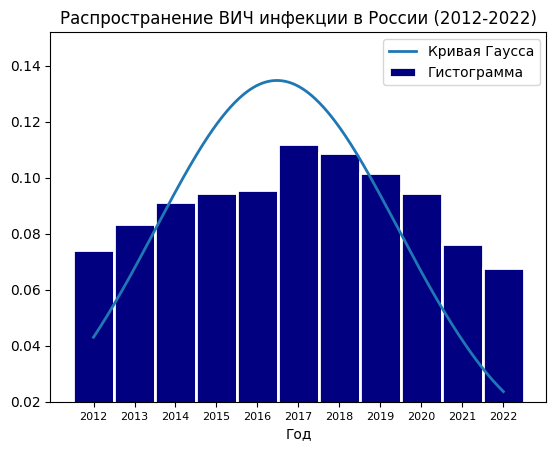

In [13]:
m, sD = 0, 0
for key, value in new_interval.items():
    list3 = key.split('-')
    m += ((int(list3[0]) + int(list3[1]))/2)*value
for key, value in new_interval.items():
    list3 = key.split('-')
    sD += (((int(list3[0]) + int(list3[1]))/2)-m)**2 * value
sigma3 = math.sqrt(sD)
for key, value in align.items():
    align[key] = norm.pdf(key, loc=m, scale=sigma3)
df_align = pd.DataFrame({'x': align.keys(),  'f(x)' : align.values()})
print(df_align)
years_1=list(align.keys())
y=list(align.values())
cubic_interpolation_model = interp1d(years_1, y, kind = "cubic")
X_=np.linspace(years[0], years[len(years)-1], 500)
Y_=cubic_interpolation_model(X_)
plt.bar(years, new_interval.values(), color='navy', width=1, edgecolor="white", linewidth=2, align='center', label="Гистограмма")
plt.plot(X_, Y_, linewidth= 2, label="Кривая Гаусса")
plt.title('Распространение ВИЧ инфекции в России (2012-2022)')
plt.xticks(df['Год'], df['Год'], fontsize=8)
plt.xlabel('Год')
plt.ylim(0.02, max(new_interval.values())+0.04)
plt.legend()
plt.show()



In [14]:
corrected_sum = 0
for i in range(n):
    corrected_sum += (int(hiv_cases[i]) - avg1)**2/(n-1)
corrected_sigma = math.sqrt(corrected_sum)
t_crit = stats.t.ppf((1-(1-0.95)/2), n-1)
delta = corrected_sigma*t_crit/math.sqrt(n) 
left = avg1 - delta
right = avg1 + delta
print(f"Доверительный интервал для оценки мат. ожидания: {left} < a < {right}")

Доверительный интервал для оценки мат. ожидания: 75889.59806929837 < a < 93630.58374888345


In [15]:
factors = pd.read_excel('Факторы.xlsx')
data = factors.values.tolist()
x_cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']
x = factors[x_cols].values.T
y = factors['y'].values
avg_x, sigma_x, r, rho = [], [], [], []
for i in range(0, len(x)):
    avg_x.append(np.mean(x[i]))
    sigma_x.append(np.std(x[i]))
avg_y = np.mean(y)
sigma_y = np.std(y)
for i in range(0, len(x)):
    r.append(Pearson_coeff(x[i], y))
    print(f'Коэффициент корреляции Пирсона для параметра X{i+1}: {r[i]:.2f}')
    rho.append(spearmanr(x[i], y)[0])
    print(f'Коэффициент ранговой корреляции Спирмена для параметра X{i+1}: {rho[i]:.2f}\n')

Коэффициент корреляции Пирсона для параметра X1: 0.83
Коэффициент ранговой корреляции Спирмена для параметра X1: 0.80

Коэффициент корреляции Пирсона для параметра X2: 0.79
Коэффициент ранговой корреляции Спирмена для параметра X2: 0.78

Коэффициент корреляции Пирсона для параметра X3: -0.86
Коэффициент ранговой корреляции Спирмена для параметра X3: -0.82

Коэффициент корреляции Пирсона для параметра X4: -0.63
Коэффициент ранговой корреляции Спирмена для параметра X4: -0.71

Коэффициент корреляции Пирсона для параметра X5: 0.51
Коэффициент ранговой корреляции Спирмена для параметра X5: 0.48

Коэффициент корреляции Пирсона для параметра X6: -0.82
Коэффициент ранговой корреляции Спирмена для параметра X6: -0.87

Коэффициент корреляции Пирсона для параметра X7: 0.88
Коэффициент ранговой корреляции Спирмена для параметра X7: 0.90

Коэффициент корреляции Пирсона для параметра X8: -0.55
Коэффициент ранговой корреляции Спирмена для параметра X8: -0.60

Коэффициент корреляции Пирсона для парам

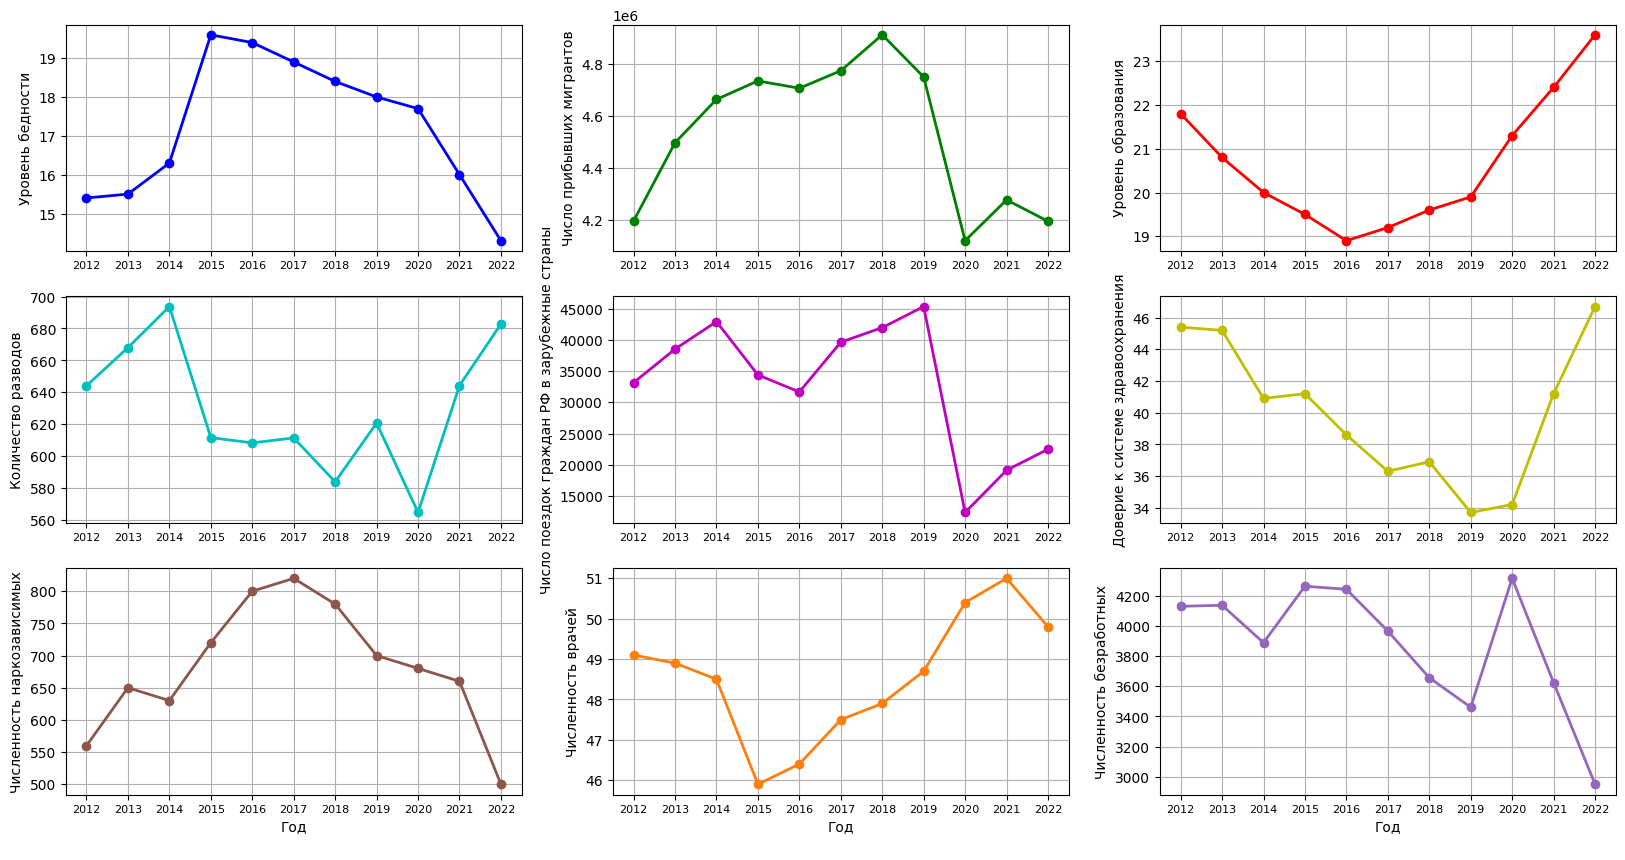

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
base_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'tab:brown', 'tab:orange', 'tab:purple']
x_labels = ['Уровень бедности',
'Число прибывших мигрантов',
'Уровень образования',
'Количество разводов',
'Число поездок граждан РФ в зарубежные страны',
'Доверие к системе здравоохранения',
'Численность наркозависимых',
'Численность врачей',
'Численность безработных']
for i in range(9):
    row = i // 3
    col = i % 3
    axs[row, col].plot(factors['Год'], x[i], marker='o', color=base_colors[i], linewidth= 2)
    axs[row, col].grid(True)
    if (i>5):
        axs[row, col].set_xlabel('Год\n')
    axs[row, col].set_ylabel(x_labels[i])
    axs[row, col].set_xticks(factors['Год'], factors['Год'], fontsize=8)
plt.show()

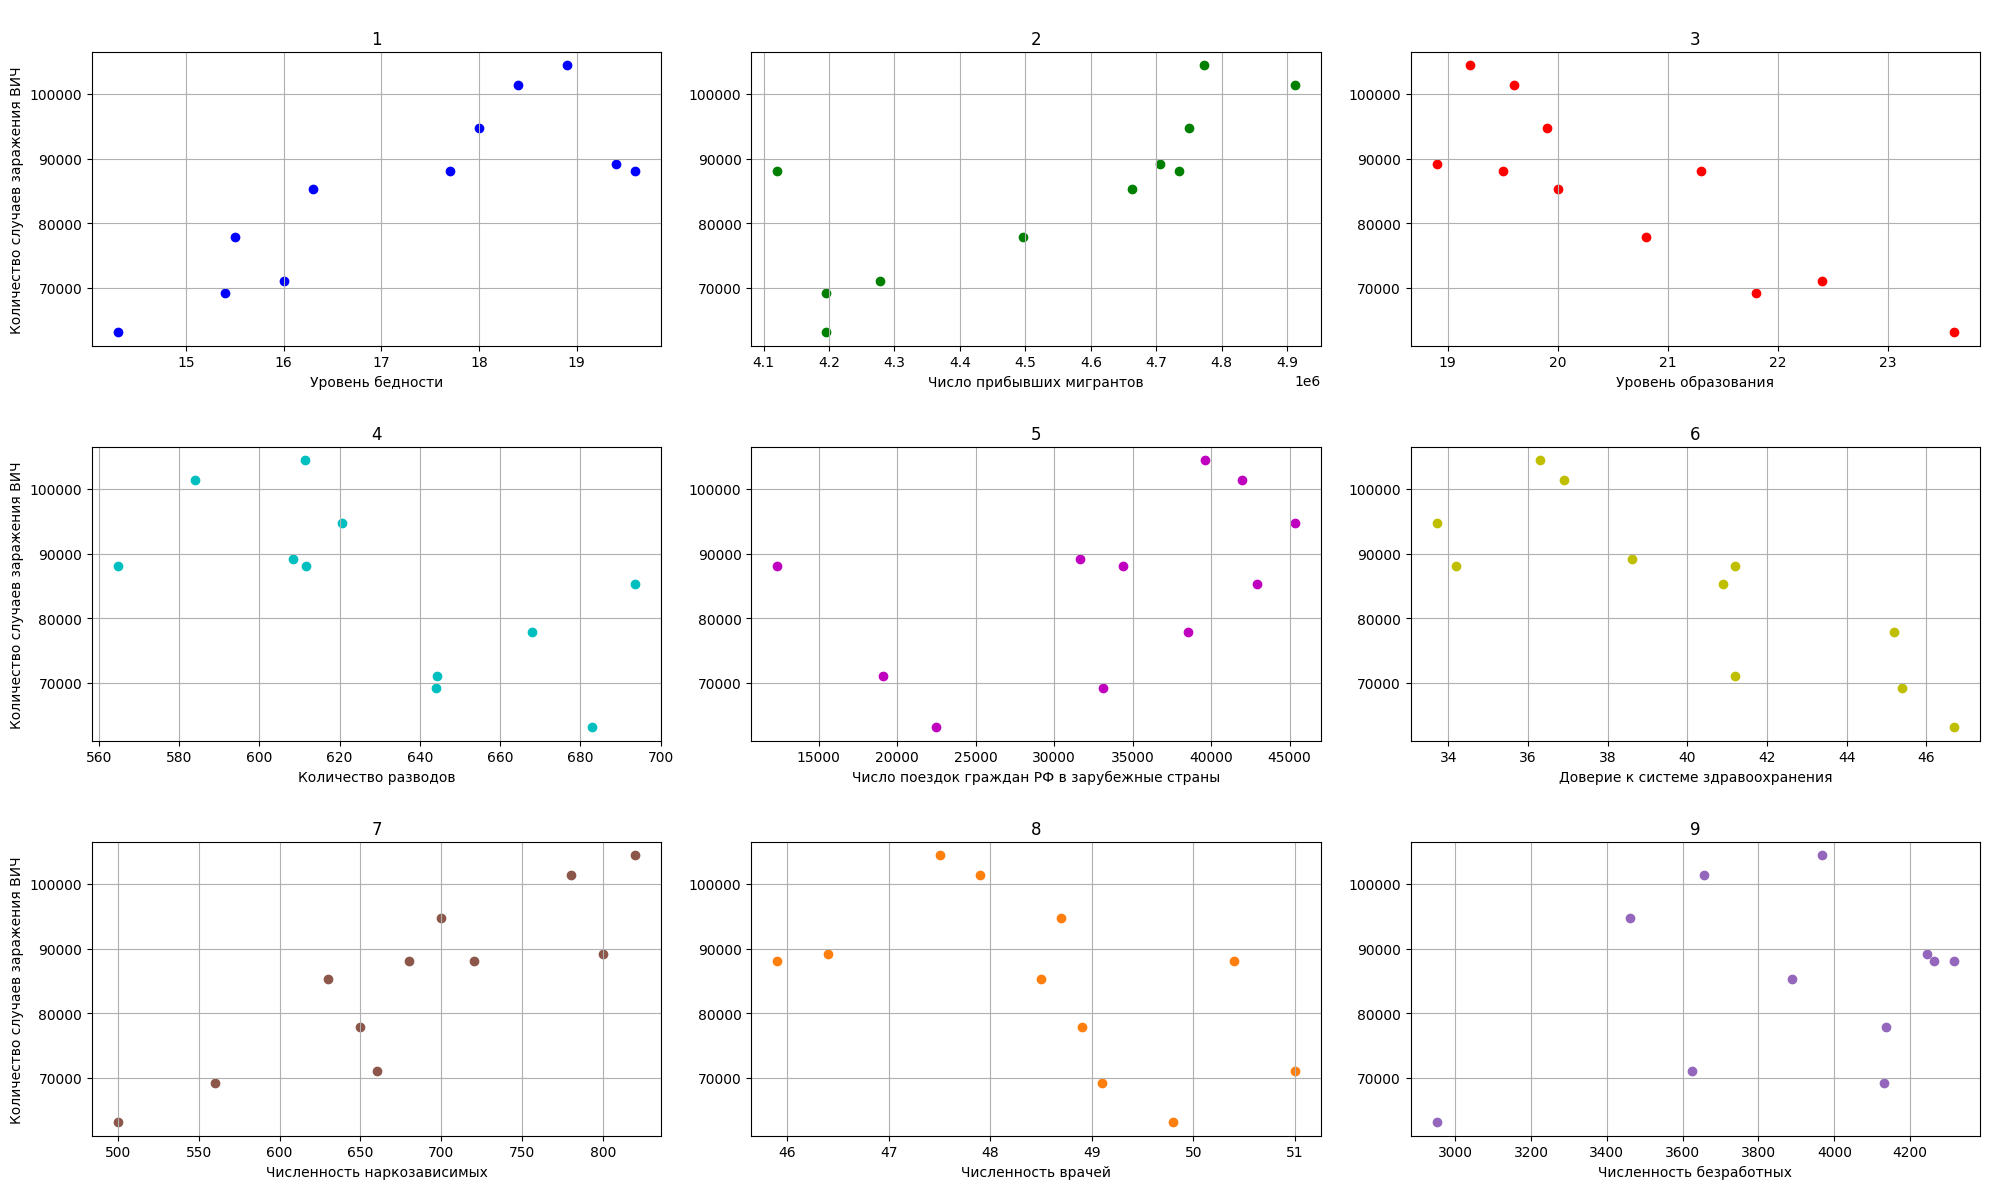

In [17]:
fig, axs = plt.subplots(3, 3, figsize=(20, 12))
for i in range(9):
    row = i // 3  
    col = i % 3 
    axs[row, col].grid(True)
    axs[row, col].scatter(x[i], y, color=base_colors[i])
    axs[row, col].set_xlabel(x_cols[i])
    axs[row, col].set_ylabel('y')
    axs[row, col].set_xlabel(x_labels[i])
    if (col % 3 == 0):
        axs[row, col].set_ylabel('Количество случаев заражения ВИЧ')
    else:
        axs[row, col].set_ylabel('')
    axs[row, col].set_title(f'\n{i+1}')
plt.tight_layout()
plt.show()

In [18]:
a, b = [], []
for i in range(0, len(x)):
    a.append(r[i]*(sigma_y/sigma_x[i]))
    b.append(avg_y-r[i]*(sigma_y*avg_x[i]/sigma_x[i]))
    print(f"Y(X{i+1}) = {a[i]:.3f} * X + {b[i]:.3f}")
    print(f"Коэффициент детерминации: {r[i]**2:.2f}\n")

Y(X1) = 6094.935 * X + -20239.022
Коэффициент детерминации: 0.69

Y(X2) = 0.037 * X + -82375.640
Коэффициент детерминации: 0.62

Y(X3) = -7669.190 * X + 243024.290
Коэффициент детерминации: 0.75

Y(X4) = -207.308 * X + 215428.308
Коэффициент детерминации: 0.40

Y(X5) = 0.626 * X + 64185.040
Коэффициент детерминации: 0.26

Y(X6) = -2402.269 * X + 180916.355
Коэффициент детерминации: 0.67

Y(X7) = 118.768 * X + 3781.851
Коэффициент детерминации: 0.78

Y(X8) = -4608.372 * X + 308517.475
Коэффициент детерминации: 0.30

Y(X9) = 9.168 * X + 49221.404
Коэффициент детерминации: 0.08



In [19]:
cond_x1, cond_x2, cond_x3, cond_y1, cond_y2, cond_y3,= [], [], [], [], [], []
for i in range(0, len(x)):
    x1 = min(x[i])
    xn = max(x[i])
    y1 = y[x[i].tolist().index(x1)]
    yn = y[x[i].tolist().index(xn)]
    cond_x1.append((x1+xn)/2)
    cond_x2.append(math.sqrt(x1*xn))
    cond_x3.append((2*x1*xn)/(x1+xn))
    cond_y1.append((y1+yn)/2)
    cond_y3.append((2*y1*yn)/(y1+yn))
    cond_y2.append(math.sqrt(y1*yn))
delta = []
for i in range(0, len(x)):
    delta = []
    delta.append(abs(cond_y1[i] - ys(cond_x1[i], x[i].tolist(), y.tolist())))
    delta.append(abs(cond_y2[i] - ys(cond_x2[i], x[i].tolist(), y.tolist())))
    delta.append(abs(cond_y2[i] - ys(cond_x1[i], x[i].tolist(), y.tolist())))
    delta.append(abs(cond_y1[i] - ys(cond_x3[i], x[i].tolist(), y.tolist())))
    delta.append(abs(cond_y3[i] - ys(cond_x1[i], x[i].tolist(), y.tolist())))
    delta.append(abs(cond_y3[i] - ys(cond_x3[i], x[i].tolist(), y.tolist())))
    delta.append(abs(cond_y1[i] - ys(cond_x2[i], x[i].tolist(), y.tolist())))
    print(f"Номер структуры для зависимости y от X{i+1}: {delta.index(min(delta))+1}")
    delta.clear()

Номер структуры для зависимости y от X1: 4
Номер структуры для зависимости y от X2: 5
Номер структуры для зависимости y от X3: 4
Номер структуры для зависимости y от X4: 5
Номер структуры для зависимости y от X5: 5
Номер структуры для зависимости y от X6: 1
Номер структуры для зависимости y от X7: 2
Номер структуры для зависимости y от X8: 1
Номер структуры для зависимости y от X9: 7


In [20]:
nonlinear_model, new_x = [], []
for i in range(0, len(x)):
    print(f'Для X{i+1}:')
    if ((i == 1) or (i == 3) or (i == 4)):
        v, nonlinear_y = [], []
        u = x[i]
        for j in range(0, len(x[i])):
            v.append(1/(y[j]))
        coeff = coefficient(u, v)
        print(f"Y(x) = {coeff[0]} * X + {coeff[1]}")
        for j in range(0, len(x[i])):
            nonlinear_y.append(1/(coeff[0]*(x[i][j])+coeff[1]))
        model(nonlinear_y, x[i], nonlinear_model, new_x)
    elif ((i == 0) or (i == 2)):
        u, nonlinear_y = [], []
        v = y
        for j in range(0, len(x[i])):
            u.append(1/(x[i][j]))
        coeff = coefficient(u, v)
        print(f"Y(x) = {coeff[0]} * X + {coeff[1]}")
        for j in range(0, len(x[i])):
            nonlinear_y.append(coeff[1] + coeff[0]/(x[i][j]))
        model(nonlinear_y, x[i], nonlinear_model, new_x)
    elif ((i == 5) or (i == 7)):
        nonlinear_y = []
        coeff = coefficient(x[i], y.tolist())
        print(f"Y(x) = {coeff[0]} * X + {coeff[1]}")
        for j in range(0, len(x[i])):
            nonlinear_y.append(coeff[0]*x[i][j] + coeff[1])
        print('Зависимость линейная')
        df = pd.DataFrame({'Значения нелинейной зависимости y': nonlinear_y, 'X': x[i]})
        print(df)
        print('\n')
        nonlinear_model.append(nonlinear_y.copy())
        new_x.append(x[i].tolist().copy())
    elif (i == 8):
        u, nonlinear_y = [], []
        v = y
        for j in range(0, len(x[i])):
            u.append(math.log(x[i][j]))
        coeff = coefficient(u, v)
        print(f"Y(x) = {coeff[0]} * X + {coeff[1]}")
        for j in range(0, len(x[i])):
            nonlinear_y.append(coeff[0]*math.log(x[i][j])+coeff[1])
        model(nonlinear_y, x[i], nonlinear_model, new_x)
    elif (i == 6):
        u, v, nonlinear_y = [], [], []
        for j in range(0, len(x[i])):
            v.append(math.log10(y[j]))
            u.append(math.log10(x[i][j]))
        coeff = coefficient(u, v)
        print(f"Y(x) = {coeff[0]} * X + {coeff[1]}")
        for j in range(0, len(x[i])):
            nonlinear_y.append(math.pow(10, coeff[1])*math.pow(x[i][j], coeff[0]))
        model(nonlinear_y, x[i], nonlinear_model, new_x)

Для X1:
Коэффициент корреляции Пирсона: -0.854214625698744
Коэффициент детерминации: 0.7296826267576453
Коэффициенты линеаризованного уравнения: a1 = -1788728.9949826046 и b1 = 189662.27641153993
Y(x) = -1788728.9949826046 * X + 189662.27641153993
    Значения нелинейной зависимости y     X
0                        64576.332706  14.3
1                        73511.042971  15.4
2                        74260.405768  15.5
3                        77866.714225  16.0
4                        79924.301259  16.3
5                        88604.141102  17.7
6                        90288.443357  18.0
7                        92448.744076  18.4
8                        95020.530645  18.9
9                        97459.750897  19.4
10                       98400.592994  19.6


Для X2:
Коэффициент корреляции Пирсона: -0.7826281306049351
Коэффициент детерминации: 0.6125067908141754
Коэффициенты линеаризованного уравнения: a1 = -5.508128154611112e-12 и b1 = 3.702664934742079e-05
Y(x) = -5.508128154

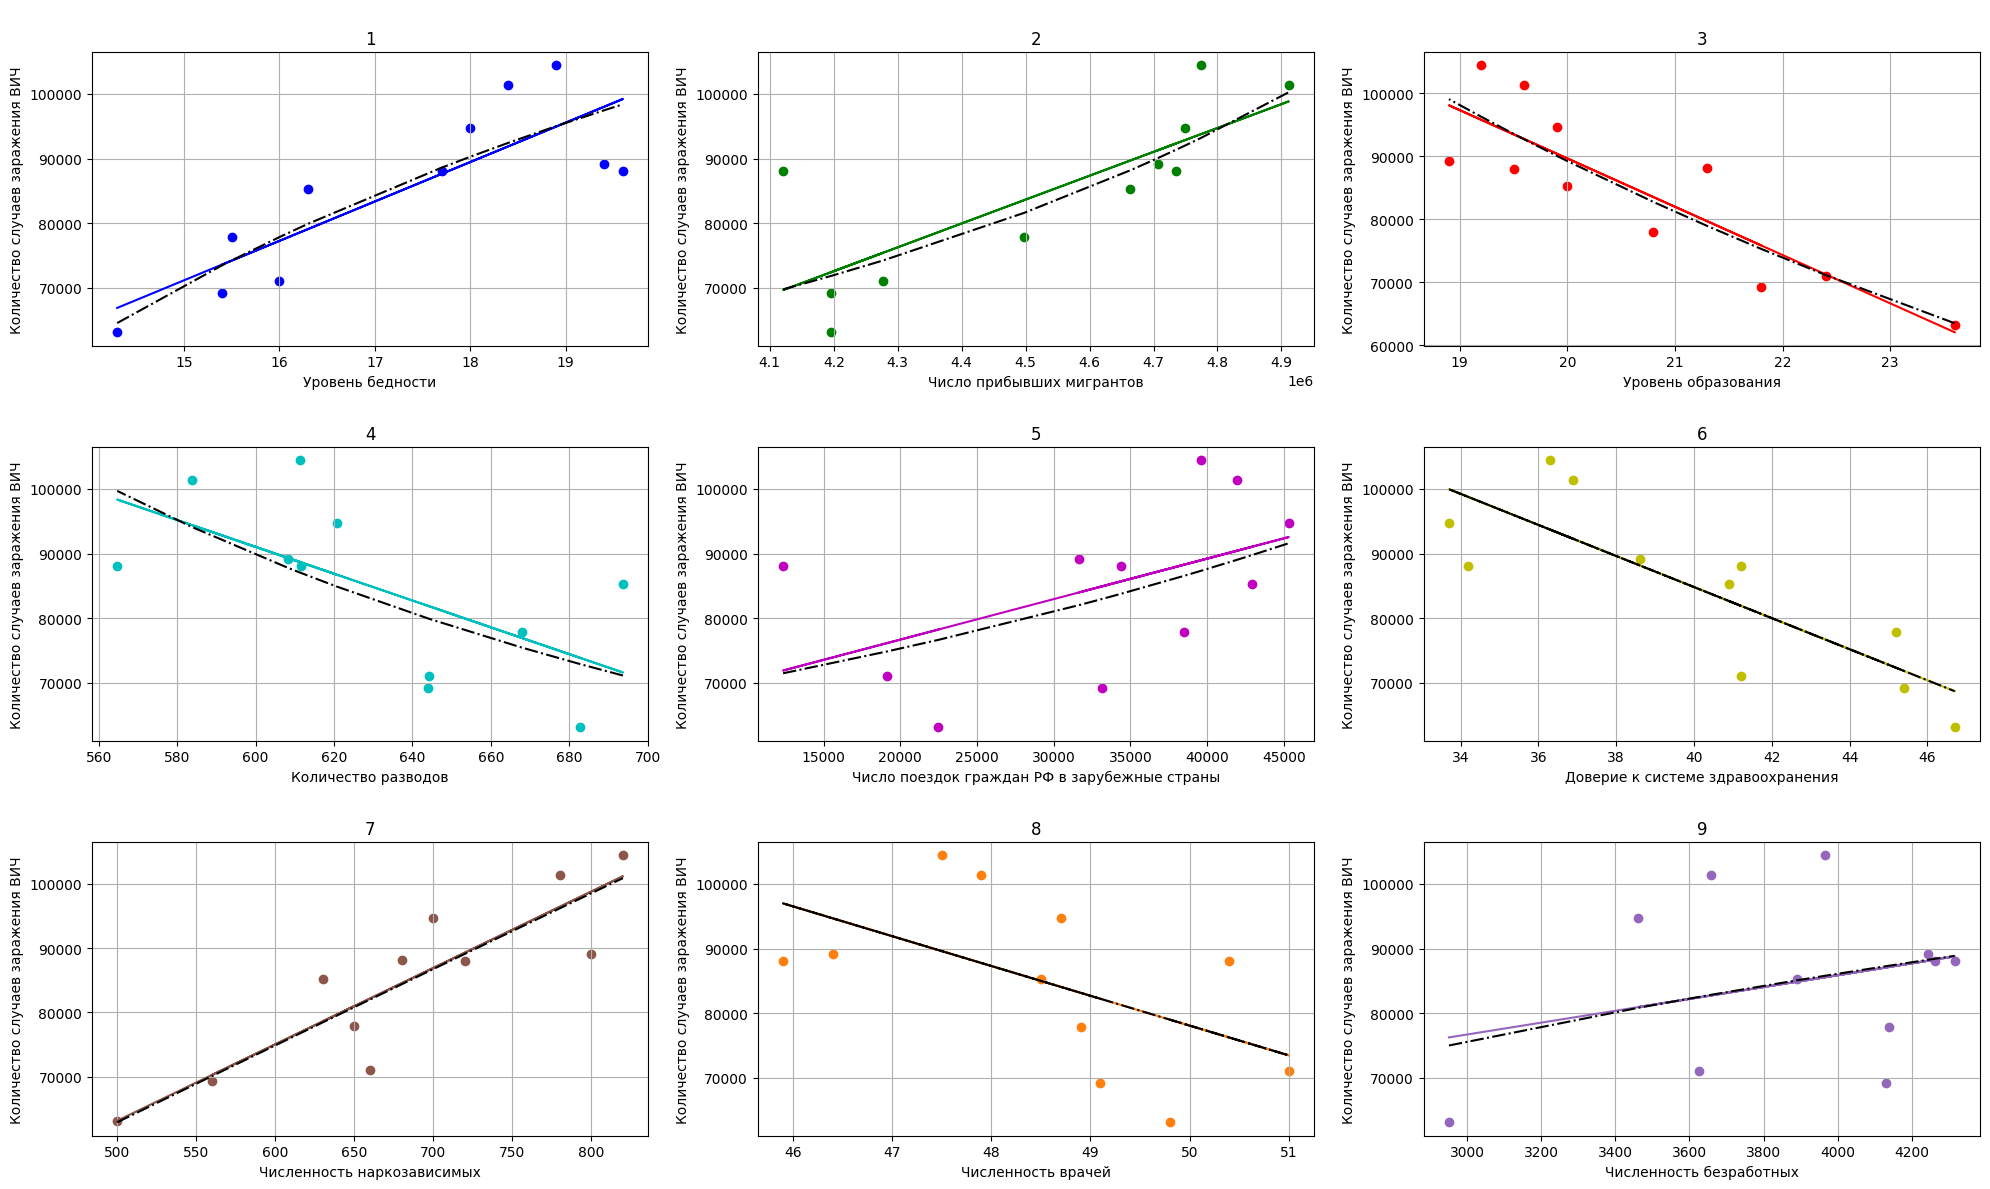

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(20, 12))
linear_model = []
linear_model_d = []
for i in range (0, len(x)):
    for j in range (0, len(x[i])):
        linear_model_d.append(a[i]*x[i][j] + b[i])
    linear_model.append(linear_model_d.copy())
    linear_model_d.clear()
for i in range(9):
    row = i // 3
    col = i % 3 
    axs[row, col].scatter(x[i], y, color=base_colors[i])
    axs[row, col].set_xlabel(x_cols[i])
    axs[row, col].set_ylabel('y')
    axs[row, col].grid(True)
    axs[row, col].set_xlabel(x_labels[i])
    axs[row, col].plot(x[i], linear_model[i], label='Линейная аппроксимация', color=base_colors[i])
    axs[row, col].plot(new_x[i], nonlinear_model[i], label='Нелинейная аппроксимация', color = 'black', linestyle='-.')
    axs[row, col].set_ylabel('Количество случаев заражения ВИЧ')
    axs[row, col].set_title(f'\n{i+1}')
plt.tight_layout()
plt.show()

In [22]:
param = pd.read_excel('Факторы.xlsx')
param.drop('Год', axis=1, inplace=True)
data = param.values
correlation_matrix = param.corr(method = 'pearson')
print("Матрица парных корреляций:")
print(correlation_matrix.to_string())
X = data[:, :-1] 
Y = data[:, -1]
X = np.insert(X, 0, 1, axis=1)
XTX = np.dot(X.T, X)  
XTX_inv = np.linalg.inv(XTX)  
XTY = np.dot(X.T, Y)  
beta = np.dot(XTX_inv, XTY) 
print(beta)
print(f"\nУравнение регрессии: y' = {beta[0]: .2f} +{(-1*beta[1]): .2f}*X1 +{beta[2]: .2f}*X2 +{beta[3]: .2f}*X3 +{beta[4]: .3f}*X4 +{beta[5]: .2f}*X5 -{(-1*beta[6]): .2f}*X6 +{beta[7]: .2f}*X7 -{-1*beta[8]: .2f}*X8 +{beta[9]: .2f}*X9")



Матрица парных корреляций:
          X1        X2        X3        X4        X5        X6        X7        X8        X9         y
X1  1.000000  0.691803 -0.856790 -0.735497  0.262603 -0.717206  0.896946 -0.731410  0.473747  0.833467
X2  0.691803  1.000000 -0.864053 -0.207816  0.807345 -0.430906  0.740024 -0.763741  0.077915  0.790211
X3 -0.856790 -0.864053  1.000000  0.433218 -0.641403  0.580468 -0.858802  0.805999 -0.519350 -0.863570
X4 -0.735497 -0.207816  0.433218  1.000000  0.183747  0.746048 -0.668829  0.223057 -0.410793 -0.634273
X5  0.262603  0.807345 -0.641403  0.183747  1.000000 -0.115197  0.330097 -0.570992 -0.015165  0.505794
X6 -0.717206 -0.430906  0.580468  0.746048 -0.115197  1.000000 -0.711635  0.142969 -0.179624 -0.820454
X7  0.896946  0.740024 -0.858802 -0.668829  0.330097 -0.711635  1.000000 -0.597536  0.423484  0.883903
X8 -0.731410 -0.763741  0.805999  0.223057 -0.570992  0.142969 -0.597536  1.000000 -0.389087 -0.547492
X9  0.473747  0.077915 -0.519350 -0.410793 -0.

In [23]:
y_mean = np.mean(Y)
SST = np.sum((Y - y_mean)**2)
Y_pred = np.dot(X, beta)
SSE = np.sum((Y - Y_pred)**2)
r2 = 1 - (SSE / SST)
print(f"Коэффициент детерминации: {r2:.2f}")

bet = beta.tolist()
e = []
for i in range (0, len(bet)-1):
    e.append(beta[i+1]*np.mean(x[i])/np.mean(y))
elasticity = pd.DataFrame({'Параметры': x_labels, 'Коэффициенты эластичности:': e})
print(elasticity.to_string(index = False))

Коэффициент детерминации: 0.99
                                   Параметры  Коэффициенты эластичности:
                            Уровень бедности                   -4.202833
                   Число прибывших мигрантов                    5.289206
                         Уровень образования                   10.238224
                         Количество разводов                    0.961801
Число поездок граждан РФ в зарубежные страны                    0.025187
           Доверие к системе здравоохранения                   -4.558513
                  Численность наркозависимых                    1.420578
                          Численность врачей                  -14.041694
                     Численность безработных                    2.600199


In [24]:
data = {'y': y, 'x1': x[0], 'x2': x[1], 'x3': x[2], 'x4': x[3], 'x5': x[4], 'x6': x[5], 'x7': x[6], 'x8': x[7], 'x9': x[8]}
df = pd.DataFrame(data)
model = ols('y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9', data=df).fit()
f_statistic = model.fvalue
print(f'F-критерий: {f_statistic:.4f}')
p_value = model.f_pvalue
print(f'Значимость F: {p_value:.4f}')
critical_value = f.ppf(1 - 0.05, 9, 1)
print("Табличное значение критерия Фишера:", critical_value)
anova_table = sm.stats.anova_lm(model)
print("Число степеней свободы (остаточное):", anova_table.iloc[-1, 0])
print("Факторная S:", anova_table.iloc[:-1, 1].sum())
print("Остаточная S:", anova_table.iloc[-1, 1])
print("Общая S:", anova_table.iloc[:10, 1].sum())
print("Остаточная S^2:", anova_table.iloc[-1, 2])


F-критерий: 13.3375
Значимость F: 0.2096
Табличное значение критерия Фишера: 240.54325471326283
Число степеней свободы (остаточное): 1.0
Факторная S: 1729022653.5433404
Остаточная S: 14404001.36575007
Общая S: 1743426654.9090905
Остаточная S^2: 14404001.36575007


In [25]:

print(model.summary())
results_summary = model.summary()
std_err = results_summary.tables[1]
std_err_df = pd.DataFrame(std_err.data)
print(std_err_df[5])


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     13.34
Date:                Wed, 17 Apr 2024   Prob (F-statistic):              0.210
Time:                        01:32:46   Log-Likelihood:                -93.076
No. Observations:                  11   AIC:                             206.2
Df Residuals:                       1   BIC:                             210.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.77e+05   3.12e+05      0.888      0.5

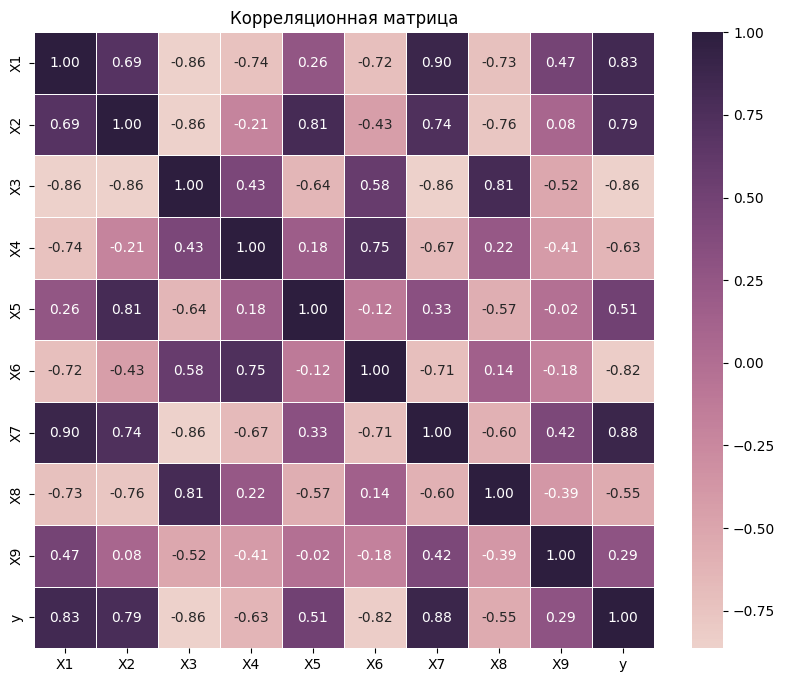

In [26]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap=sns.cubehelix_palette(as_cmap=True), annot=True, linewidths=.5, fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [27]:
data = {'y': y, 'x1': x[0], 'x2': x[1], 'x3': x[2], 'x4': x[3], 'x6': x[5], 'x7': x[6]}
df = pd.DataFrame(data)
X = sm.add_constant(df[['x1', 'x2', 'x3', 'x4', 'x6', 'x7']])
Y = df['y']
model = sm.OLS(Y, X).fit()
print(model.params.to_string())

y_mean = np.mean(Y)
SST = np.sum((Y - y_mean)**2)
Y_pred = np.dot(X, model.params)
SSE = np.sum((Y - Y_pred)**2)
r2 = 1 - (SSE / SST)
print(f"Коэффициент детерминации: {r2:.2f}")
print(f"Исправленный коэффициент детерминации: {1-10/(11-6-1)*(1-r2)}")

#print(model.summary())
results_summary = model.summary()
std_err = results_summary.tables[1]
std_err_df = pd.DataFrame(std_err.data)
print(std_err_df.to_string())

const    202180.894656
x1        -2603.809700
x2            0.018403
x3        -3226.931341
x4          -87.958415
x6        -1161.067457
x7           18.460032
Коэффициент детерминации: 0.95
Исправленный коэффициент детерминации: 0.8647995173099114
       0           1          2          3       4          5          6
0               coef    std err          t   P>|t|     [0.025     0.975]
1  const   2.022e+05   1.49e+05      1.359   0.246  -2.11e+05   6.15e+05
2     x1  -2603.8097   2744.956     -0.949   0.397  -1.02e+04   5017.411
3     x2      0.0184      0.012      1.490   0.210     -0.016      0.053
4     x3  -3226.9313   3144.944     -1.026   0.363   -1.2e+04   5504.832
5     x4    -87.9584     88.911     -0.989   0.379   -334.815    158.898
6     x6  -1161.0675    573.427     -2.025   0.113  -2753.157    431.022
7     x7     18.4600     43.000      0.429   0.690   -100.928    137.848


In [28]:
data = {'y': y, 'x1': x[0], 'x2': x[1], 'x3': x[2], 'x4': x[3], 'x6': x[5], 'x7': x[6]}
df = pd.DataFrame(data)
model = ols('y ~ x1 + x2 + x3 + x4 + x6 + x7', data=df).fit()
f_statistic = model.fvalue
print(f'F-критерий: {f_statistic:.4f}')
p_value = model.f_pvalue
print(f'Значимость F: {p_value:.4f}')
critical_value = f.ppf(1 - 0.05, 6, 4)
print("Табличное значение критерия Фишера:", critical_value)
anova_table = sm.stats.anova_lm(model)
print("Число степеней свободы (остаточное):", anova_table.iloc[-1, 0])
print("Факторная S:", anova_table.iloc[:-1, 1].sum())
print("Остаточная S:", anova_table.iloc[-1, 1])
print("Общая S:", anova_table.iloc[:10, 1].sum())
print("Остаточная S^2:", anova_table.iloc[-1, 2])

F-критерий: 11.6607
Значимость F: 0.0163
Табличное значение критерия Фишера: 6.163132282688632
Число степеней свободы (остаточное): 4.0
Факторная S: 1649141804.7977006
Остаточная S: 94284850.11139119
Общая S: 1743426654.909092
Остаточная S^2: 23571212.527847797


In [29]:
data = {'y': y, 'x1': x[0], 'x2': x[1], 'x3': x[2], 'x4': x[3], 'x6': x[5]}
df = pd.DataFrame(data)
X = sm.add_constant(df[['x1', 'x2', 'x3', 'x4', 'x6']])
Y = df['y']
model = sm.OLS(Y, X).fit()
print(model.params.to_string())

y_mean = np.mean(Y)
SST = np.sum((Y - y_mean)**2)
Y_pred = np.dot(X, model.params)
SSE = np.sum((Y - Y_pred)**2)
r2 = 1 - (SSE / SST)
print(f"Коэффициент детерминации: {r2:.2f}")
print(f"Исправленный коэффициент детерминации: {1-10/(11-5-1)*(1-r2)}")

#print(model.summary())
results_summary = model.summary()
std_err = results_summary.tables[1]
std_err_df = pd.DataFrame(std_err.data)
print(std_err_df.to_string())


const    221056.974865
x1        -2387.390203
x2            0.019894
x3        -3609.745237
x4         -100.223687
x6        -1189.641268
Коэффициент детерминации: 0.94
Исправленный коэффициент детерминации: 0.886856170914804
       0           1          2          3       4          5          6
0               coef    std err          t   P>|t|     [0.025     0.975]
1  const   2.211e+05    1.3e+05      1.700   0.150  -1.13e+05   5.55e+05
2     x1  -2387.3902   2468.376     -0.967   0.378  -8732.552   3957.771
3     x2      0.0199      0.011      1.835   0.126     -0.008      0.048
4     x3  -3609.7452   2758.925     -1.308   0.248  -1.07e+04   3482.297
5     x4   -100.2237     77.022     -1.301   0.250   -298.215     97.768
6     x6  -1189.6413    521.026     -2.283   0.071  -2528.981    149.698


In [30]:
data = {'y': y, 'x1': x[0], 'x2': x[1], 'x3': x[2], 'x4': x[3], 'x6': x[5]}
df = pd.DataFrame(data)
model = ols('y ~ x1 + x2 + x3 + x4 + x6', data=df).fit()
f_statistic = model.fvalue
print(f'F-критерий: {f_statistic:.4f}')
p_value = model.f_pvalue
print(f'Значимость F: {p_value:.4f}')
critical_value = f.ppf(1 - 0.05, 5, 5)
print("Табличное значение критерия Фишера:", critical_value)
anova_table = sm.stats.anova_lm(model)
print("Число степеней свободы (остаточное):", anova_table.iloc[-1, 0])
print("Факторная S:", anova_table.iloc[:-1, 1].sum())
print("Остаточная S:", anova_table.iloc[-1, 1])
print("Общая S:", anova_table.iloc[:10, 1].sum())
print("Остаточная S^2:", anova_table.iloc[-1, 2])

F-критерий: 16.6766
Значимость F: 0.0039
Табличное значение критерия Фишера: 5.050329057632646
Число степеней свободы (остаточное): 5.0
Факторная S: 1644797671.1762867
Остаточная S: 98628983.73280442
Общая S: 1743426654.909091
Остаточная S^2: 19725796.746560883


In [31]:
data = {'y': y, 'x2': x[1], 'x3': x[2], 'x4': x[3], 'x6': x[5]}
df = pd.DataFrame(data)
X = sm.add_constant(df[['x2', 'x3', 'x4', 'x6']])
Y = df['y']
model = sm.OLS(Y, X).fit()
print(model.params.to_string())

y_mean = np.mean(Y)
SST = np.sum((Y - y_mean)**2)
Y_pred = np.dot(X, model.params)
SSE = np.sum((Y - Y_pred)**2)
r2 = 1 - (SSE / SST)
print(f"Коэффициент детерминации: {r2:.2f}")
print(f"Исправленный коэффициент детерминации: {1-10/(11-4-1)*(1-r2)}")

#print(model.summary())
results_summary = model.summary()
std_err = results_summary.tables[1]
std_err_df = pd.DataFrame(std_err.data)
print(std_err_df.to_string())

const    123432.496230
x2            0.018041
x3        -2010.308036
x4          -48.689143
x6        -1204.651028
Коэффициент детерминации: 0.93
Исправленный коэффициент детерминации: 0.8880732590007727
       0           1          2          3       4          5          6
0               coef    std err          t   P>|t|     [0.025     0.975]
1  const   1.234e+05   8.15e+04      1.514   0.181   -7.6e+04   3.23e+05
2     x2      0.0180      0.011      1.700   0.140     -0.008      0.044
3     x3  -2010.3080   2196.475     -0.915   0.395  -7384.889   3364.273
4     x4    -48.6891     55.318     -0.880   0.413   -184.047     86.669
5     x6  -1204.6510    517.986     -2.326   0.059  -2472.117     62.815


In [32]:
data = {'y': y, 'x2': x[1], 'x3': x[2], 'x4': x[3], 'x6': x[5]}
df = pd.DataFrame(data)
model = ols('y ~ x2 + x3 + x4 + x6', data=df).fit()
f_statistic = model.fvalue
print(f'F-критерий: {f_statistic:.4f}')
p_value = model.f_pvalue
print(f'Значимость F: {p_value:.4f}')
critical_value = f.ppf(1 - 0.05, 4, 6)
print("Табличное значение критерия Фишера:", critical_value)
anova_table = sm.stats.anova_lm(model)
print("Число степеней свободы (остаточное):", anova_table.iloc[-1, 0])
print("Факторная S:", anova_table.iloc[:-1, 1].sum())
print("Остаточная S:", anova_table.iloc[-1, 1])
print("Общая S:", anova_table.iloc[:10, 1].sum())
print("Остаточная S^2:", anova_table.iloc[-1, 2])

F-критерий: 20.8360
Значимость F: 0.0012
Табличное значение критерия Фишера: 4.533676950275243
Число степеней свободы (остаточное): 6.0
Факторная S: 1626345016.715996
Остаточная S: 117081638.19309506
Общая S: 1743426654.909091
Остаточная S^2: 19513606.365515843


In [33]:
data = {'y': y, 'x2': x[1], 'x3': x[2], 'x6': x[5]}
df = pd.DataFrame(data)
X = sm.add_constant(df[['x2', 'x3', 'x6']])
Y = df['y']
model = sm.OLS(Y, X).fit()
print(model.params.to_string())

y_mean = np.mean(Y)
SST = np.sum((Y - y_mean)**2)
Y_pred = np.dot(X, model.params)
SSE = np.sum((Y - Y_pred)**2)
r2 = 1 - (SSE / SST)
print(f"Коэффициент детерминации: {r2:.2f}")
print(f"Исправленный коэффициент детерминации: {1-10/(11-3-1)*(1-r2)}")

#print(model.summary())
results_summary = model.summary()
std_err = results_summary.tables[1]
std_err_df = pd.DataFrame(std_err.data)
print(std_err_df.to_string())

const    131195.347123
x2            0.014822
x3        -2577.595429
x6        -1508.484965
Коэффициент детерминации: 0.92
Исправленный коэффициент детерминации: 0.8916757535867748
       0           1          2          3       4          5          6
0               coef    std err          t   P>|t|     [0.025     0.975]
1  const   1.312e+05   7.97e+04      1.646   0.144  -5.73e+04    3.2e+05
2     x2      0.0148      0.010      1.512   0.174     -0.008      0.038
3     x3  -2577.5954   2065.716     -1.248   0.252  -7462.238   2307.047
4     x6  -1508.4850    379.929     -3.970   0.005  -2406.875   -610.095


In [34]:
data = {'y': y, 'x2': x[1], 'x3': x[2], 'x6': x[5]}
df = pd.DataFrame(data)
model = ols('y ~ x2 + x3 + x6', data=df).fit()
f_statistic = model.fvalue
print(f'F-критерий: {f_statistic:.4f}')
p_value = model.f_pvalue
print(f'Значимость F: {p_value:.4f}')
critical_value = f.ppf(1 - 0.05, 3, 7)
print("Табличное значение критерия Фишера:", critical_value)
anova_table = sm.stats.anova_lm(model)
print("Число степеней свободы (остаточное):", anova_table.iloc[-1, 0])
print("Факторная S:", anova_table.iloc[:-1, 1].sum())
print("Остаточная S:", anova_table.iloc[-1, 1])
print("Общая S:", anova_table.iloc[:10, 1].sum())
print("Остаточная S^2:", anova_table.iloc[-1, 2])

F-критерий: 28.4385
Значимость F: 0.0003
Табличное значение критерия Фишера: 4.346831399907815
Число степеней свободы (остаточное): 7.0
Факторная S: 1611227889.910261
Остаточная S: 132198764.99883048
Общая S: 1743426654.9090915
Остаточная S^2: 18885537.856975783
